Credit card fraud detection model 

3 types of classification model:

1. Without Feature Selection and without data balancing
2. With Feature Selection and without data balancing
3. With Feature Selection and with data balancing
4. Without Feature Selection and with data balancing

In [18]:
!pip install numpy pandas matplotlib seaborn scikit-learn

  Using cached scikit_learn-1.4.0-1-cp310-cp310-win_amd64.whl (10.6 MB)
  Using cached scipy-1.12.0-cp310-cp310-win_amd64.whl (46.2 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

C:\Users\prath\AppData\Local\Temp\ipykernel_30504\1494754143.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [15]:
# Importing and analysing the dataset
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

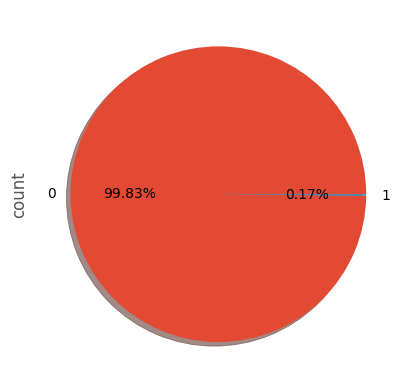

In [16]:
df["Class"].value_counts().plot(kind= "pie",autopct='%1.2f%%', shadow = True)
plt.show()

In [19]:
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [21]:
legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [22]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [20]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


As data is highly unbalanced we need to balance it

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC

Without Feature Selection and without data balancing

In [27]:
X = df.drop(columns="Class")           
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (213605, 30)
X Test  :  (71202, 30)
Y Train :  (213605,)
Y Test  :  (71202,)


In [28]:
LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
MLP = MLPClassifier()
SVC=SVC()

In [33]:
LR.fit(X_train,y_train)
ypred = LR.predict(X_test)
print(LR,":\n",classification_report(y_test,ypred))
print("********************************************")

DTR.fit(X_train,y_train)
ypred = DTR.predict(X_test)
print(DTR,":\n",classification_report(y_test,ypred))
print("********************************************")

RFR.fit(X_train,y_train)
ypred = RFR.predict(X_test)
print(RFR,":\n",classification_report(y_test,ypred))
print("********************************************")

KNR.fit(X_train,y_train)
ypred = KNR.predict(X_test)
print(KNR,":\n",classification_report(y_test,ypred))
print("********************************************")

MLP.fit(X_train,y_train)
ypred = MLP.predict(X_test)
print(MLP,":\n",classification_report(y_test,ypred))
print("********************************************")

SVC.fit(X_train,y_train)
ypred = SVC.predict(X_test)
print(SVC,":\n",classification_report(y_test,ypred))
print("********************************************")

C:\projects\ML\credit_fraud_detection\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.61      0.59      0.60       113

    accuracy                           1.00     71202
   macro avg       0.81      0.80      0.80     71202
weighted avg       1.00      1.00      1.00     71202

********************************************
DecisionTreeClassifier() :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.71      0.74      0.72       113

    accuracy                           1.00     71202
   macro avg       0.85      0.87      0.86     71202
weighted avg       1.00      1.00      1.00     71202

********************************************
RandomForestClassifier() :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.92      0.80      0.85       113

    accuracy

C:\projects\ML\credit_fraud_detection\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\projects\ML\credit_fraud_detection\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\projects\ML\credit_fraud_detection\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

With Feature Selection and without data balancing

In [34]:
from sklearn.feature_selection import SelectPercentile

In [35]:
F_50 = SelectPercentile( percentile= 50)
set_X = F_50.fit_transform(X,y)

In [36]:
FS_x =pd.DataFrame(set_X,columns= [ i for i,j in zip (X.columns, F_50.get_support()) if j == True ])
FS_x

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981


In [37]:
X = FS_x      
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
LR.fit(X_train,y_train)
ypred = LR.predict(X_test)
print(LR,":\n",classification_report(y_test,ypred))
print("********************************************")

DTR.fit(X_train,y_train)
ypred = DTR.predict(X_test)
print(DTR,":\n",classification_report(y_test,ypred))
print("********************************************")

RFR.fit(X_train,y_train)
ypred = RFR.predict(X_test)
print(RFR,":\n",classification_report(y_test,ypred))
print("********************************************")

KNR.fit(X_train,y_train)
ypred = KNR.predict(X_test)
print(KNR,":\n",classification_report(y_test,ypred))
print("********************************************")

MLP.fit(X_train,y_train)
ypred = MLP.predict(X_test)
print(MLP,":\n",classification_report(y_test,ypred))
print("********************************************")

SVC.fit(X_train,y_train)
ypred = SVC.predict(X_test)
print(SVC,":\n",classification_report(y_test,ypred))
print("********************************************")

LogisticRegression() :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.83      0.59      0.69       113

    accuracy                           1.00     71202
   macro avg       0.91      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202

********************************************
DecisionTreeClassifier() :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.71      0.78      0.74       113

    accuracy                           1.00     71202
   macro avg       0.85      0.89      0.87     71202
weighted avg       1.00      1.00      1.00     71202

********************************************
RandomForestClassifier() :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.93      0.77      0.84       113

    accuracy

This data is highly unbalanced so the best metric to calculate efficiency is f1-score for 1.
You can see the f1-score for 1 increased after using feature extraction.

Random Forest Classifier is giving the best f1-score for 1 of 0.84

With Feature Selection and with data balancing

In [52]:
legit_sample = legit.sample(n=492)
balanced_df = pd.concat([legit_sample, fraud], axis=0)
balanced_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
259610,159196.0,-1.905451,2.272360,-1.382722,0.869588,-0.370347,-0.856581,0.020436,1.313534,-0.450615,...,0.172948,0.468436,-0.114319,-0.047389,0.110792,-0.369387,0.367603,0.209285,5.99,0
244584,152410.0,2.052646,-0.102170,-1.078682,0.414843,-0.164990,-1.142989,0.130530,-0.275853,0.628869,...,-0.290023,-0.723641,0.353823,-0.029285,-0.333379,0.203009,-0.071432,-0.061725,1.98,0
8223,11055.0,1.189239,-0.025485,0.985957,0.256872,-0.854403,-0.627561,-0.517071,-0.084322,1.424481,...,0.001630,0.240627,-0.005876,0.559473,0.157949,1.000326,-0.091274,-0.001760,15.95,0
143429,85347.0,-0.806924,0.985300,1.083525,-1.176312,-0.678492,-1.167162,0.097048,0.399496,0.139810,...,-0.057487,-0.344062,0.038460,0.400127,-0.274599,0.715132,-0.092635,0.001381,0.23,0
85975,61022.0,-0.371806,0.819405,2.134793,0.563418,-0.203519,-0.691185,1.033441,-0.330350,-0.423058,...,-0.100286,-0.220377,0.073508,0.671890,-0.187955,-0.717490,-0.087783,-0.138918,59.99,0


In [53]:
balanced_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [54]:
b_X = balanced_df.drop(columns="Class")           
b_y = balanced_df["Class"]

In [57]:
set_balanced_df = F_50.fit_transform(b_X,b_y)
FS_balanced_df = pd.DataFrame(set_balanced_df ,columns= [ i for i,j in zip (b_X.columns, F_50.get_support()) if j == True ])
FS_balanced_df

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18
0,-1.905451,2.272360,-1.382722,0.869588,-0.370347,-0.856581,0.020436,-0.450615,0.504955,-0.137545,-0.281883,1.960600,-0.611241,0.606161,0.489447
1,2.052646,-0.102170,-1.078682,0.414843,-0.164990,-1.142989,0.130530,0.628869,0.081963,-0.790759,0.146365,0.397963,-0.136222,-0.198135,-0.886500
2,1.189239,-0.025485,0.985957,0.256872,-0.854403,-0.627561,-0.517071,1.424481,-0.358949,2.566880,-1.475165,1.633470,0.611693,0.103721,0.552376
3,-0.806924,0.985300,1.083525,-1.176312,-0.678492,-1.167162,0.097048,0.139810,-0.744806,-0.751822,-0.325939,0.377321,0.799733,-0.479000,-0.233291
4,-0.371806,0.819405,2.134793,0.563418,-0.203519,-0.691185,1.033441,-0.423058,-0.348113,0.021603,0.385312,-0.218904,0.062862,-0.563684,-0.231126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,-2.064945,-5.587794,2.115795,-5.417424,-6.665177,-2.897825,-4.570529,-1.315147
980,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,-1.127396,-3.232153,2.858466,-3.096915,-5.210141,-2.155297,-3.267116,-0.688505
981,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,-0.652250,-3.463891,1.794969,-2.775022,-4.057162,-1.603015,-5.035326,-0.507000
982,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,-1.632333,-5.245984,1.933520,-5.030465,-6.416628,-2.549498,-4.614717,-1.478138


In [58]:
b_X = FS_balanced_df

b_X_train, b_X_test, b_y_train, b_y_test = train_test_split(b_X, b_y, test_size=0.25, random_state=42)

print("X Train : ", b_X_train.shape)
print("X Test  : ", b_X_test.shape)
print("Y Train : ", b_y_train.shape)
print("Y Test  : ", b_y_test.shape)

X Train :  (738, 15)
X Test  :  (246, 15)
Y Train :  (738,)
Y Test  :  (246,)


In [59]:
LR.fit(b_X_train,b_y_train)
ypred = LR.predict(b_X_test)
print(LR,":\n",classification_report(b_y_test,ypred))
print("********************************************")

DTR.fit(b_X_train,b_y_train)
ypred = DTR.predict(b_X_test)
print(DTR,":\n",classification_report(b_y_test,ypred))
print("********************************************")

RFR.fit(b_X_train,b_y_train)
ypred = RFR.predict(b_X_test)
print(RFR,":\n",classification_report(b_y_test,ypred))
print("********************************************")

KNR.fit(b_X_train,b_y_train)
ypred = KNR.predict(b_X_test)
print(KNR,":\n",classification_report(b_y_test,ypred))
print("********************************************")

MLP.fit(b_X_train,b_y_train)
ypred = MLP.predict(b_X_test)
print(MLP,":\n",classification_report(b_y_test,ypred))
print("********************************************")

SVC.fit(b_X_train,b_y_train)
ypred = SVC.predict(b_X_test)
print(SVC,":\n",classification_report(b_y_test,ypred))
print("********************************************")

LogisticRegression() :
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       126
           1       0.96      0.88      0.92       120

    accuracy                           0.92       246
   macro avg       0.93      0.92      0.92       246
weighted avg       0.93      0.92      0.92       246

********************************************
DecisionTreeClassifier() :
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       126
           1       0.91      0.89      0.90       120

    accuracy                           0.91       246
   macro avg       0.91      0.91      0.91       246
weighted avg       0.91      0.91      0.91       246

********************************************
RandomForestClassifier() :
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       126
           1       0.95      0.88      0.91       120

    accuracy

C:\projects\ML\credit_fraud_detection\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


As we can see that f1-score for class 1 has increased after balancing the data.

MLP Classifier is giving the best f1-score for 1 of 0.93

Without Feature Selection and with data balancing

In [61]:
b_X = balanced_df.drop(columns="Class")           
b_y = balanced_df["Class"]

In [62]:
b_X_train, b_X_test, b_y_train, b_y_test = train_test_split(b_X, b_y, test_size=0.25, random_state=42)

print("X Train : ", b_X_train.shape)
print("X Test  : ", b_X_test.shape)
print("Y Train : ", b_y_train.shape)
print("Y Test  : ", b_y_test.shape)

X Train :  (738, 30)
X Test  :  (246, 30)
Y Train :  (738,)
Y Test  :  (246,)


LR.fit(b_X_train,b_y_train)
ypred = LR.predict(b_X_test)
print(LR,":\n",classification_report(b_y_test,ypred))
print("********************************************")

DTR.fit(b_X_train,b_y_train)
ypred = DTR.predict(b_X_test)
print(DTR,":\n",classification_report(b_y_test,ypred))
print("********************************************")

RFR.fit(b_X_train,b_y_train)
ypred = RFR.predict(b_X_test)
print(RFR,":\n",classification_report(b_y_test,ypred))
print("********************************************")

KNR.fit(b_X_train,b_y_train)
ypred = KNR.predict(b_X_test)
print(KNR,":\n",classification_report(b_y_test,ypred))
print("********************************************")

MLP.fit(b_X_train,b_y_train)
ypred = MLP.predict(b_X_test)
print(MLP,":\n",classification_report(b_y_test,ypred))
print("********************************************")

SVC.fit(b_X_train,b_y_train)
ypred = SVC.predict(b_X_test)
print(SVC,":\n",classification_report(b_y_test,ypred))
print("********************************************")

In conclusion, feature extraction helped in KNeighbors, MLP and SVC but did not make much difference in Logistic Regression, Decision Tree and Random Forest. 

Finally with feature selection and data balancing MLP classifier gave us the best results 